In [3]:
import requests

# Get the Oauth2  Token

In [28]:
url_token = "https://digital.iservices.rte-france.com/token/oauth/"
client_id = "f27656dd-d80f-4e29-b246-890ecf9a40a5"
client_secret = "68d25bfc-43c3-41ca-b020-6cad5121ba9a"
secret = "ZjI3NjU2ZGQtZDgwZi00ZTI5LWIyNDYtODkwZWNmOWE0MGE1OjY4ZDI1YmZjLTQzYzMtNDFjYS1iMDIwLTZjYWQ1MTIxYmE5YQ=="
headers_token = {
    "Authorization": "Basic {}".format(secret),
    "Content-Type": "application/x-www-form-urlencoded",
}
req = requests.post(url_token, headers=headers_token)
token = req.json()["access_token"]
print(req.text)

{
  "access_token" : "4KDevdRLXX4bN7xN3ZviQe5Lr9SBSQuPUgqpnOuznLxb52v3P7xVMC",
  "token_type" : "Bearer",
  "expires_in" : 7200
}


In [43]:
URL = "https://digital.iservices.rte-france.com/open_api/consumption/v1/weekly_forecasts"
params = {
    "start_date": "2024-04-01T00:00:00+02:00",
    "end_date": "2024-04-014T00:00:00+02:00"
}
headers = {
    "Host": "digital.iservices.rte-france.com",
    "Authorization": "Bearer {}".format(token),
}

req = requests.get(URL, params=params, headers=headers)
req


<Response [200]>

In [44]:
print(req.text)

{"weekly_forecasts":[{"start_date":"2024-04-13T00:00:00+02:00","end_date":"2024-04-14T00:00:00+02:00","updated_date":"2024-04-09T11:20:07+02:00","peak":{"peak_hour":"2024-04-13T13:00:00+02:00","value":45700,"temperature":11.6,"temperature_deviation":5.8},"values":[{"start_date":"2024-04-13T00:00:00+02:00","end_date":"2024-04-13T00:30:00+02:00","value":42989},{"start_date":"2024-04-13T00:30:00+02:00","end_date":"2024-04-13T01:00:00+02:00","value":41013},{"start_date":"2024-04-13T01:00:00+02:00","end_date":"2024-04-13T01:30:00+02:00","value":41111},{"start_date":"2024-04-13T01:30:00+02:00","end_date":"2024-04-13T02:00:00+02:00","value":40551},{"start_date":"2024-04-13T02:00:00+02:00","end_date":"2024-04-13T02:30:00+02:00","value":38909},{"start_date":"2024-04-13T02:30:00+02:00","end_date":"2024-04-13T03:00:00+02:00","value":37552},{"start_date":"2024-04-13T03:00:00+02:00","end_date":"2024-04-13T03:30:00+02:00","value":36497},{"start_date":"2024-04-13T03:30:00+02:00","end_date":"2024-04-1

In [46]:
data = req.json()
data["weekly_forecasts"]

[{'start_date': '2024-04-13T00:00:00+02:00',
  'end_date': '2024-04-14T00:00:00+02:00',
  'updated_date': '2024-04-09T11:20:07+02:00',
  'peak': {'peak_hour': '2024-04-13T13:00:00+02:00',
   'value': 45700,
   'temperature': 11.6,
   'temperature_deviation': 5.8},
  'values': [{'start_date': '2024-04-13T00:00:00+02:00',
    'end_date': '2024-04-13T00:30:00+02:00',
    'value': 42989},
   {'start_date': '2024-04-13T00:30:00+02:00',
    'end_date': '2024-04-13T01:00:00+02:00',
    'value': 41013},
   {'start_date': '2024-04-13T01:00:00+02:00',
    'end_date': '2024-04-13T01:30:00+02:00',
    'value': 41111},
   {'start_date': '2024-04-13T01:30:00+02:00',
    'end_date': '2024-04-13T02:00:00+02:00',
    'value': 40551},
   {'start_date': '2024-04-13T02:00:00+02:00',
    'end_date': '2024-04-13T02:30:00+02:00',
    'value': 38909},
   {'start_date': '2024-04-13T02:30:00+02:00',
    'end_date': '2024-04-13T03:00:00+02:00',
    'value': 37552},
   {'start_date': '2024-04-13T03:00:00+02:00',


In [48]:
values = {}
for day_data in data["weekly_forecasts"]:
    for pred in day_data["values"]:
        values[pred["start_date"]] = pred["value"]

In [49]:
import pandas as pd
data = pd.DataFrame(values.items(), columns=["date", "value"])
data["date"] = pd.to_datetime(data["date"])
data = data.set_index("date")
data = data.sort_index()
data

,value
date,
2024-04-01 00:00:00+02:00,42726
2024-04-01 00:30:00+02:00,40823
2024-04-01 01:00:00+02:00,40963
2024-04-01 01:30:00+02:00,40885
2024-04-01 02:00:00+02:00,39297
...,...
2024-04-13 21:30:00+02:00,41670
2024-04-13 22:00:00+02:00,43103
2024-04-13 22:30:00+02:00,44776


In [78]:
ts = pd.Timestamp("2024-04-09").timestamp() / 60

In [79]:
[a/ts  for a in  ax.get_xbound()]

[0.9995964080314802, 1.0002511939595735]

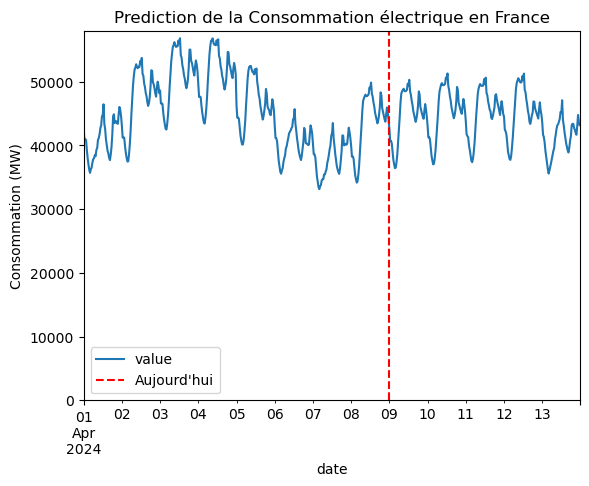

In [80]:
ax = data.plot()
ax.set_ylim(0)
ax.set_ylabel("Consommation (MW)")
ax.set_title("Prediction de la Consommation électrique en France")

ax_xpos = pd.Timestamp("2024-04-09").timestamp() / 60
ax.axvline(ax_xpos, color="red", linestyle="--", label="Aujourd'hui")
ax.legend()
